---
title: 03 - Plots for cell type predictions, human
author: Naz Salehin, Martin Proks
date: 27-11-2024
model: v1.1
---

In [3]:
!which pip

/projects/dan1/data/Brickman/conda/envs/scvi-1.1.5/bin/pip


In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import scvi
import anndata
import numpy as np
import scanpy as sc
import seaborn as sns
from scvi.model.utils import mde
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['svg.fonttype'] = 'none'

ct_colors = {
    'Prelineage': '#7985A5',
    '8C_3.0': '#028A46',
    'Morula_4.0': '#657cbd',
    'Inner Cell Mass': '#F6C445',
    'Primitive Endoderm': '#D05B61',
    'Epiblast_6.0': '#d6b2ca',
    'Epiblast_7.0': '#c38db1',
    'Late epiblast': '#aa5c8f',
    'Trophectoderm_5.0': '#cddff0',
    'Trophectoderm_6.0': '#bdd4eb',
    'Trophectoderm_7.0': '#acc9e6',
    'Trophectoderm_8.0': '#9cbfe2',
    'Trophectoderm_9.0': '#8bb4dd',
    'Trophectoderm_10.0': '#5a94ce',
    'Unknown': '#F1BD93',
}

In [5]:
ENSG_SYMBOL_df = pd.read_table('../results/GRCh38.110.ENSG_to_SYMBOL.csv', delimiter=',').set_index('ensembl')

## Human

### Human UMAP

In [250]:
niakan_adata = sc.read_h5ad("../results/niakan_08.withPredictions.adata.h5ad")
niakan_adata.uns['prediction_colors'] = [ct_colors[x] for x in niakan_adata.obs.prediction.cat.categories]

niakan_adata

AnnData object with n_obs × n_vars = 89 × 3000
    obs: 'sample', 'fastq_1', 'fastq_2', 'treatment', 'batch', 'experiment', 'technology', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', '_scvi_batch', 'ct', '_scvi_labels', 'prediction', 'entropy'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'prediction_colors', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_scANVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

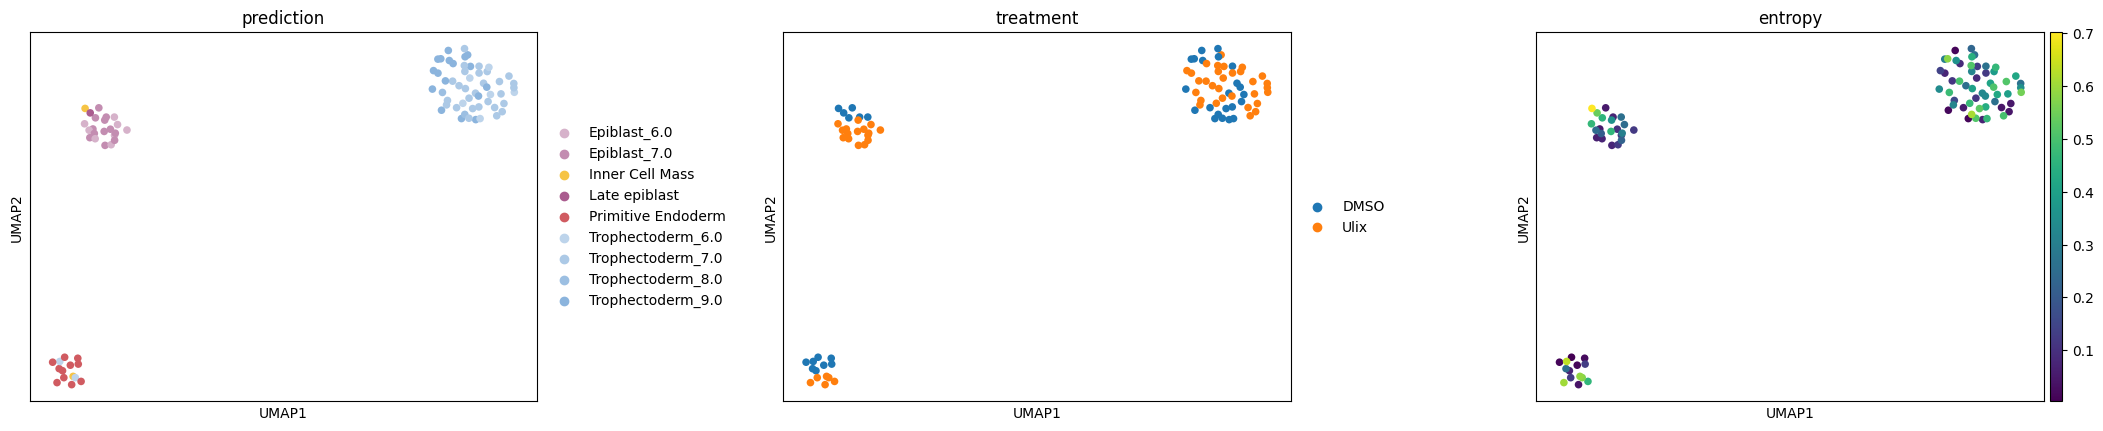

In [260]:
# plt.rcParams['figure.figsize'] = [5, 4]
ax = sc.pl.umap(niakan_adata, color=['prediction', 'treatment', 'entropy'], s=120, wspace=0.35, return_fig = True)
ax.savefig('../figures/niakan_12_UMAP_prediction_treatment_entropy.pdf', bbox_inches = 'tight')

In [259]:
# ax = sc.pl.umap(niakan_adata, color=['entropy'], s=120, return_fig = True)

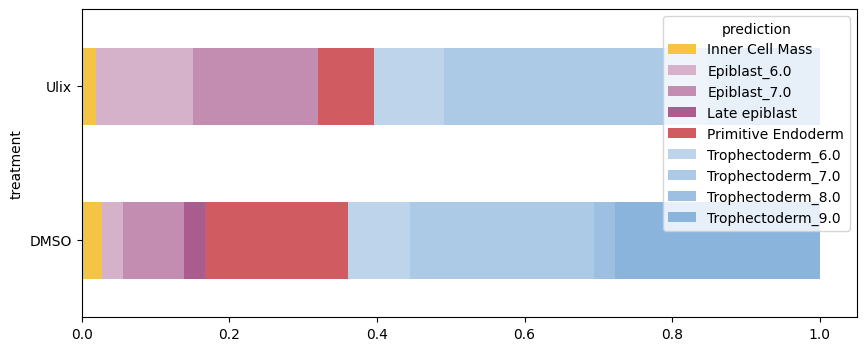

In [261]:
cmtx = sc.metrics.confusion_matrix('treatment', 'prediction', normalize=True, data=niakan_adata.obs)
column_order = ['Inner Cell Mass','Epiblast_6.0','Epiblast_7.0','Late epiblast','Primitive Endoderm','Trophectoderm_6.0','Trophectoderm_7.0','Trophectoderm_8.0','Trophectoderm_9.0']

plt.rcParams['figure.figsize'] = [10, 4]
ax = cmtx[column_order].plot(kind='barh',legend=True, stacked=True, color=ct_colors)
ax.figure.savefig('../figures/niakan_12_Proportions_withLegend.pdf')

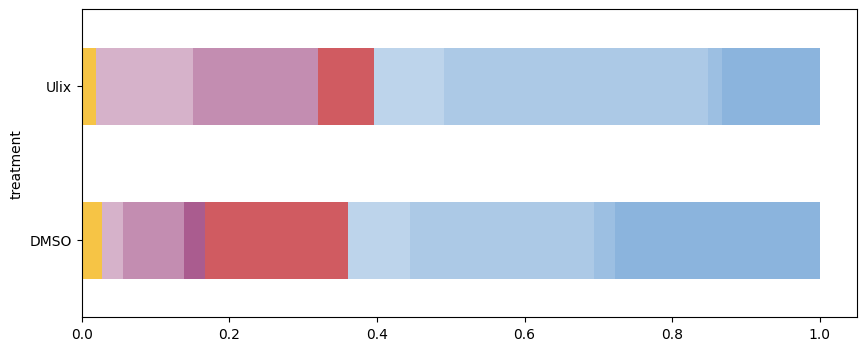

In [150]:
ax = cmtx[column_order].plot(kind='barh',legend=False, stacked=True, color=ct_colors)
ax.figure.savefig('../figures/niakan_12_Proportions_withoutLegend.pdf')

### Human heatmaps

In [263]:
niakan_adata = sc.read_h5ad("../results/11_niakan_adata_combined_notLengthNormalised_withPredictions.h5ad")

In [264]:
# remove mitochondrial genes
niakan_adata = niakan_adata[:, niakan_adata.var[~niakan_adata.var.gene_symbol.str.startswith('MT-')].index].copy()
# remove ribosomal genes
niakan_adata = niakan_adata[:, niakan_adata.var[~niakan_adata.var.gene_symbol.str.startswith(('RPS', 'RPL'))].index].copy()

In [265]:
sc.pp.normalize_total(niakan_adata,target_sum=10_000)
sc.pp.log1p(niakan_adata)
niakan_adata.raw = niakan_adata

In [266]:
niakan_adata.var['gene'] = niakan_adata.var['gene_symbol'].to_list()
niakan_adata.var = niakan_adata.var.set_index('gene')

In [267]:
niakan_adata.var_names_make_unique()

/home/fdb589/projects/data/Brickman/conda/envs/scvi-1.1.5/lib/python3.10/site-packages/anndata/utils.py:260: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


In [268]:
TE_list = ['GATA2','GATA3','AMOT','TEAD4','YAP1']
PrE_list = ['PDGFRA','OTX2','SOX17','GATA4','GATA6','HNF4A','COL4A1','COL4A2','NANOG','POU5F1']
cRAF_plusTF_responsive_list = ['SPRY4','DUSP6','EGR1','HAS3', 'MYC','DUSP5','ETV5', 'ETV4', 'ETV1', 'JUN',  'LEFTY1', 'NANOG', 'SOX2','POU5F1', 'KLF4', 'GATA4','GATA6','SOX17']

/home/fdb589/projects/data/Brickman/conda/envs/scvi-1.1.5/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


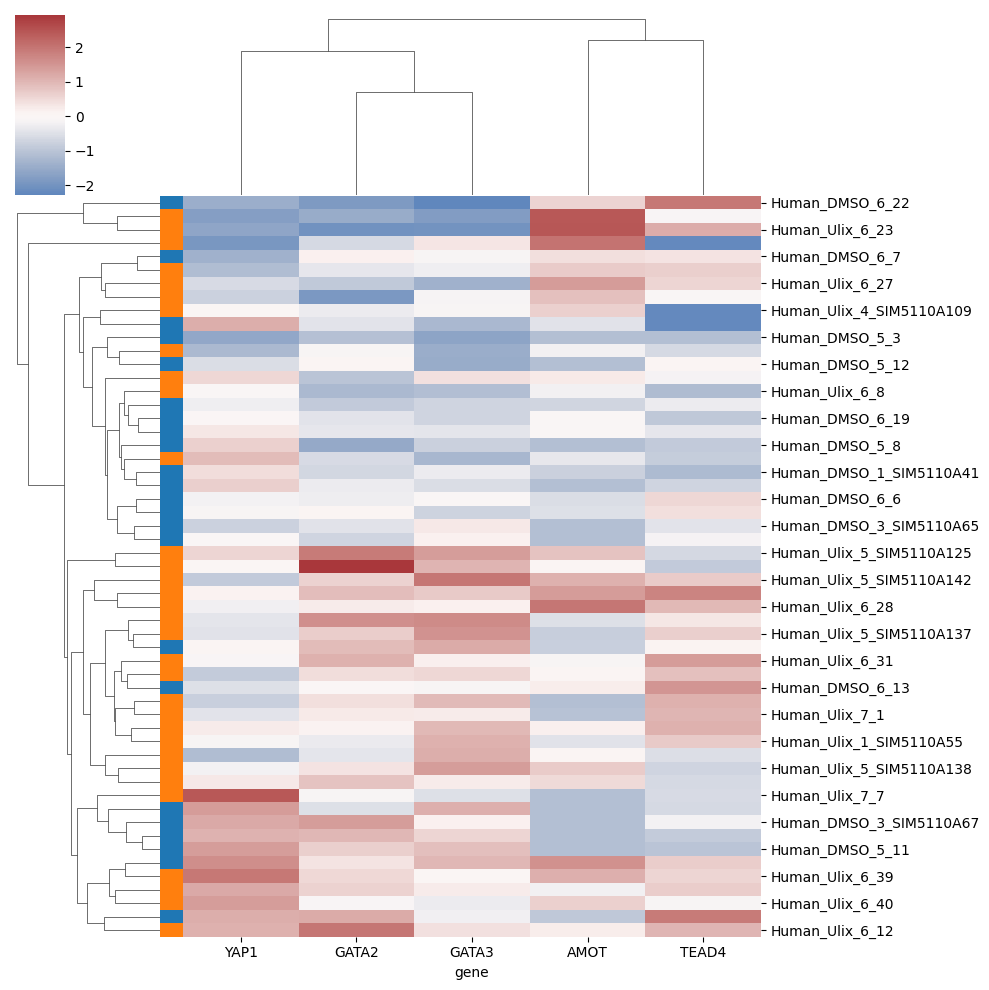

In [269]:
sc.pl.clustermap(niakan_adata[niakan_adata.obs.prediction.str.contains('Trophectoderm'),niakan_adata.var.gene_symbol.isin(TE_list)],
    obs_keys='treatment',
    z_score=1,
    cmap="vlag",
    center=0,
    use_raw = False,
    save='12_niakan_human_heatmap_for_TE.pdf'
)

/home/fdb589/projects/data/Brickman/conda/envs/scvi-1.1.5/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


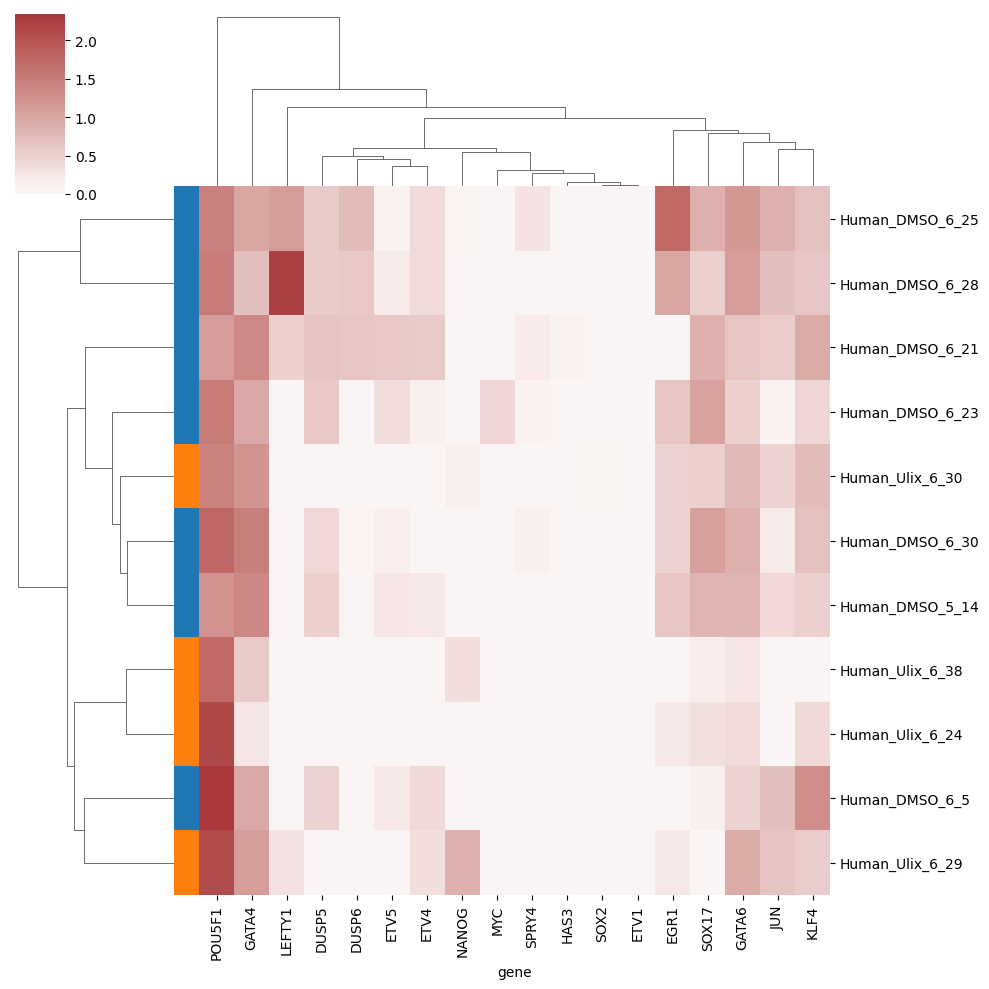

In [270]:
sc.pl.clustermap(niakan_adata[niakan_adata.obs.prediction.str.contains('Primitive Endoderm'),niakan_adata.var.gene_symbol.isin(cRAF_plusTF_responsive_list)],
    obs_keys='treatment',
    cmap="vlag",
    center=0,
    use_raw = False,
    save='12_niakan_human_heatmap_for_PrE.pdf'
)

/home/fdb589/projects/data/Brickman/conda/envs/scvi-1.1.5/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


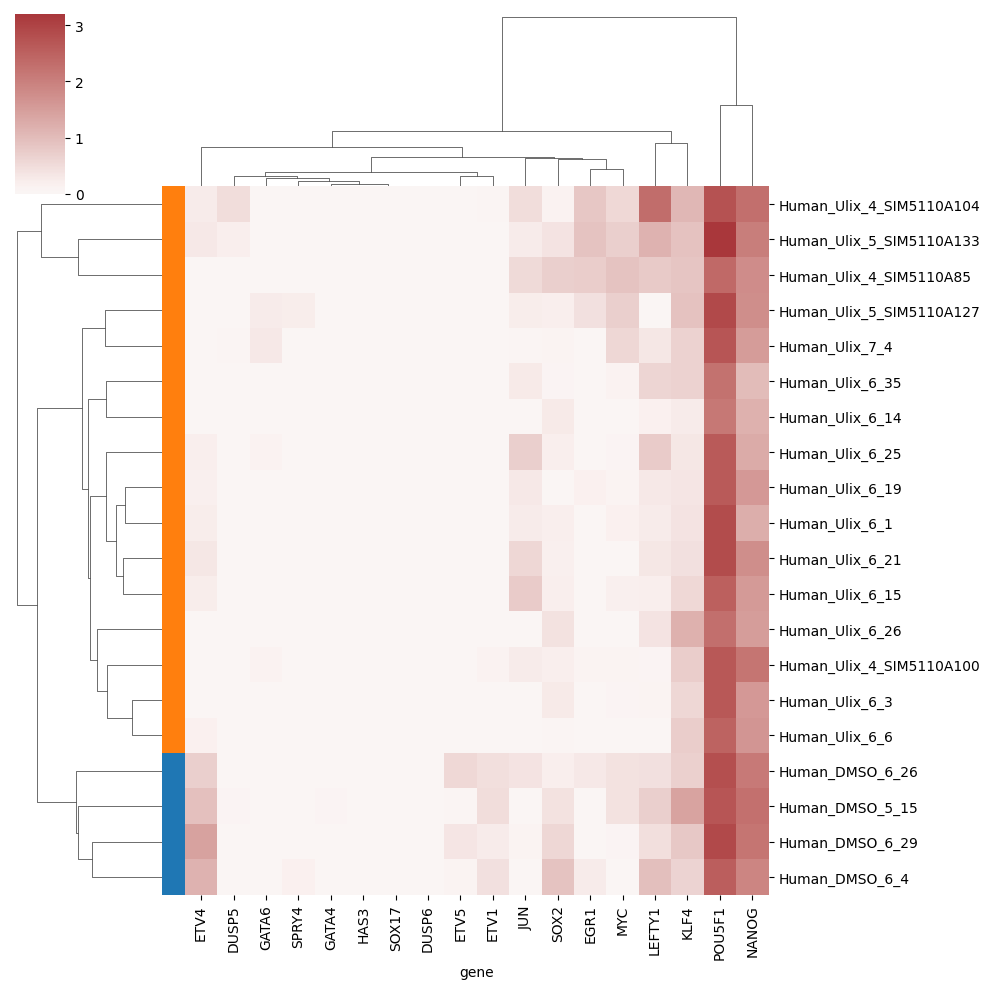

In [271]:
sc.pl.clustermap(niakan_adata[niakan_adata.obs.prediction.str.contains('Epiblast'),niakan_adata.var.gene_symbol.isin(cRAF_plusTF_responsive_list)],
    obs_keys='treatment',
    cmap="vlag",
    center=0,
    use_raw = False,
    save='12_niakan_human_heatmap_for_EPI.pdf'
)

### Integration

In [317]:
niakan_adata = sc.read_h5ad("../results/niakan_08.withPredictions.adata.h5ad")
lvae = scvi.model.SCANVI.load('../../proks-salehin-et-al-v2/results/100_human_integration/scanvi_ns_15/')

Trainer will use only 1 of 4 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=4)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.


INFO     File ../../proks-salehin-et-al-v2/results/100_human_integration/scanvi_ns_15/model.pt already downloaded  


/home/fdb589/projects/data/Brickman/conda/envs/scvi-1.1.5/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/fdb589/projects/data/Brickman/conda/envs/scvi- ...
/home/fdb589/projects/data/Brickman/conda/envs/scvi-1.1.5/lib/python3.10/site-packages/scvi/model/base/_utils.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary

In [277]:
# scvi.model.SCANVI.prepare_query_anndata(niakan_adata, lvae)
# lvae_q = scvi.model.SCANVI.load_query_data(niakan_adata, lvae)
# lvae.adata.obs['prediction'] = lvae.predict()
# lvae_q.train(max_epochs=20, plan_kwargs=dict(weight_decay=0.0), check_val_every_n_epoch=10, early_stopping=True)
# lvae.adata.obsm["X_scANVI"] = lvae.get_latent_representation()
# niakan_adata.obsm["X_scANVI"] = lvae_q.get_latent_representation()
# niakan_adata.obs['prediction'] = lvae_q.predict()
# niakan_adata.obs['entropy'] = 1 - lvae_q.predict(soft=True).max(axis=1)
# niakan_adata.obsm['X_cell_prbs'] = lvae_q.predict(soft=True)

# lvae_q.save('../results/12_niakan_human_query', save_anndata=True)

In [318]:
lvae_q = scvi.model.SCANVI.load('../results/12_niakan_human_query')
lvae.adata.obs['prediction'] = lvae.predict()
lvae.adata.obsm["X_scANVI"] = lvae.get_latent_representation()
niakan_adata.obsm["X_scANVI"] = lvae_q.get_latent_representation()
niakan_adata.obs['prediction'] = lvae_q.predict()
niakan_adata.obs['entropy'] = 1 - lvae_q.predict(soft=True).max(axis=1)
niakan_adata.obsm['X_cell_prbs'] = lvae_q.predict(soft=True)

Trainer will use only 1 of 4 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=4)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.


INFO     File ../results/12_niakan_human_query/model.pt already downloaded                                         


/home/fdb589/projects/data/Brickman/conda/envs/scvi-1.1.5/lib/python3.10/site-packages/lightning/fabric/plugins/environments/slurm.py:191: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /home/fdb589/projects/data/Brickman/conda/envs/scvi- ...
/home/fdb589/projects/data/Brickman/conda/envs/scvi-1.1.5/lib/python3.10/site-packages/scvi/model/base/_utils.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary

In [319]:
merged_adata = anndata.concat([lvae.adata.copy(), niakan_adata])
merged_adata.obs['this_study'] = merged_adata.obs['experiment'] == 'Simon et al, 2024'
merged_adata.obs.prediction = merged_adata.obs.prediction.astype('category')
merged_adata.obs.prediction = merged_adata.obs.prediction.cat.reorder_categories(['Prelineage', '8C_3.0', 'Morula_4.0', 'Inner Cell Mass', 'Epiblast_6.0', 'Epiblast_7.0', 'Late epiblast', 'Primitive Endoderm', 'Trophectoderm_5.0', 'Trophectoderm_6.0', 'Trophectoderm_7.0', 'Trophectoderm_8.0', 'Trophectoderm_9.0', 'Trophectoderm_10.0'], ordered=True)
merged_adata.uns['prediction_colors'] = [ct_colors[ct] for ct in merged_adata.obs.prediction.cat.categories]

merged_adata.obs['treatment'] = None
merged_adata.obs.loc[merged_adata.obs_names.str.contains('Ulix'), 'treatment'] = 'Ulix'
merged_adata.obs.loc[merged_adata.obs_names.str.contains('DMSO'), 'treatment'] = 'DMSO'


In [320]:
sc.pp.neighbors(merged_adata, use_rep="X_scANVI", n_neighbors = 15, metric='euclidean')
sc.tl.umap(merged_adata, min_dist=0.5)
sc.tl.draw_graph(merged_adata)

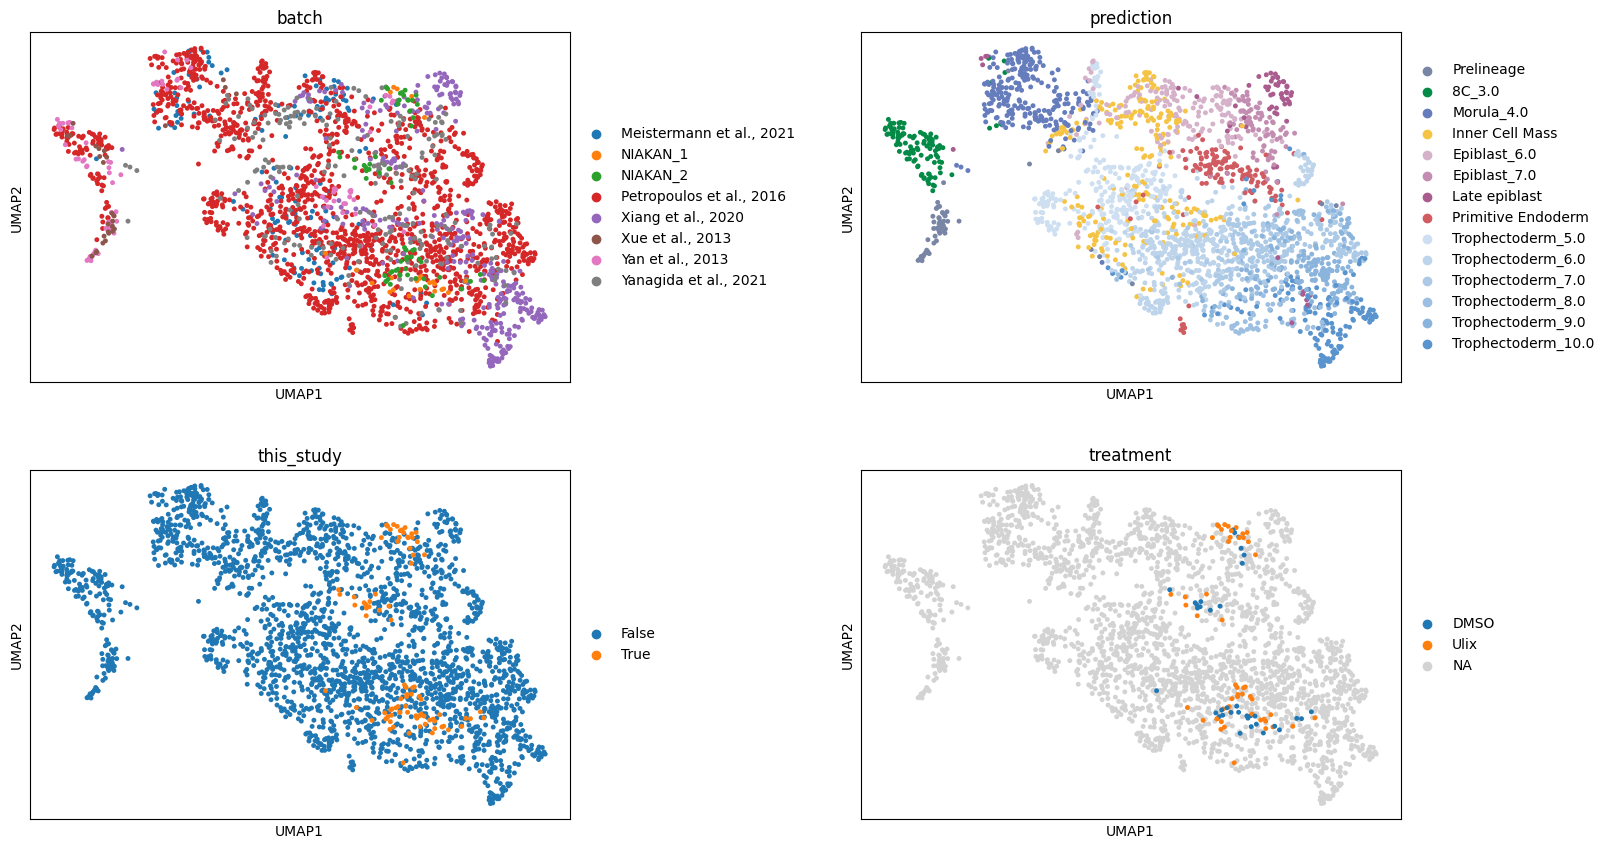

In [323]:
ax = sc.pl.umap(merged_adata, color=['batch', 'prediction', 'this_study', 'treatment'], ncols=2, wspace=0.4, return_fig=True)
ax.savefig('../figures/12_niakan_human_integration_umap.pdf')

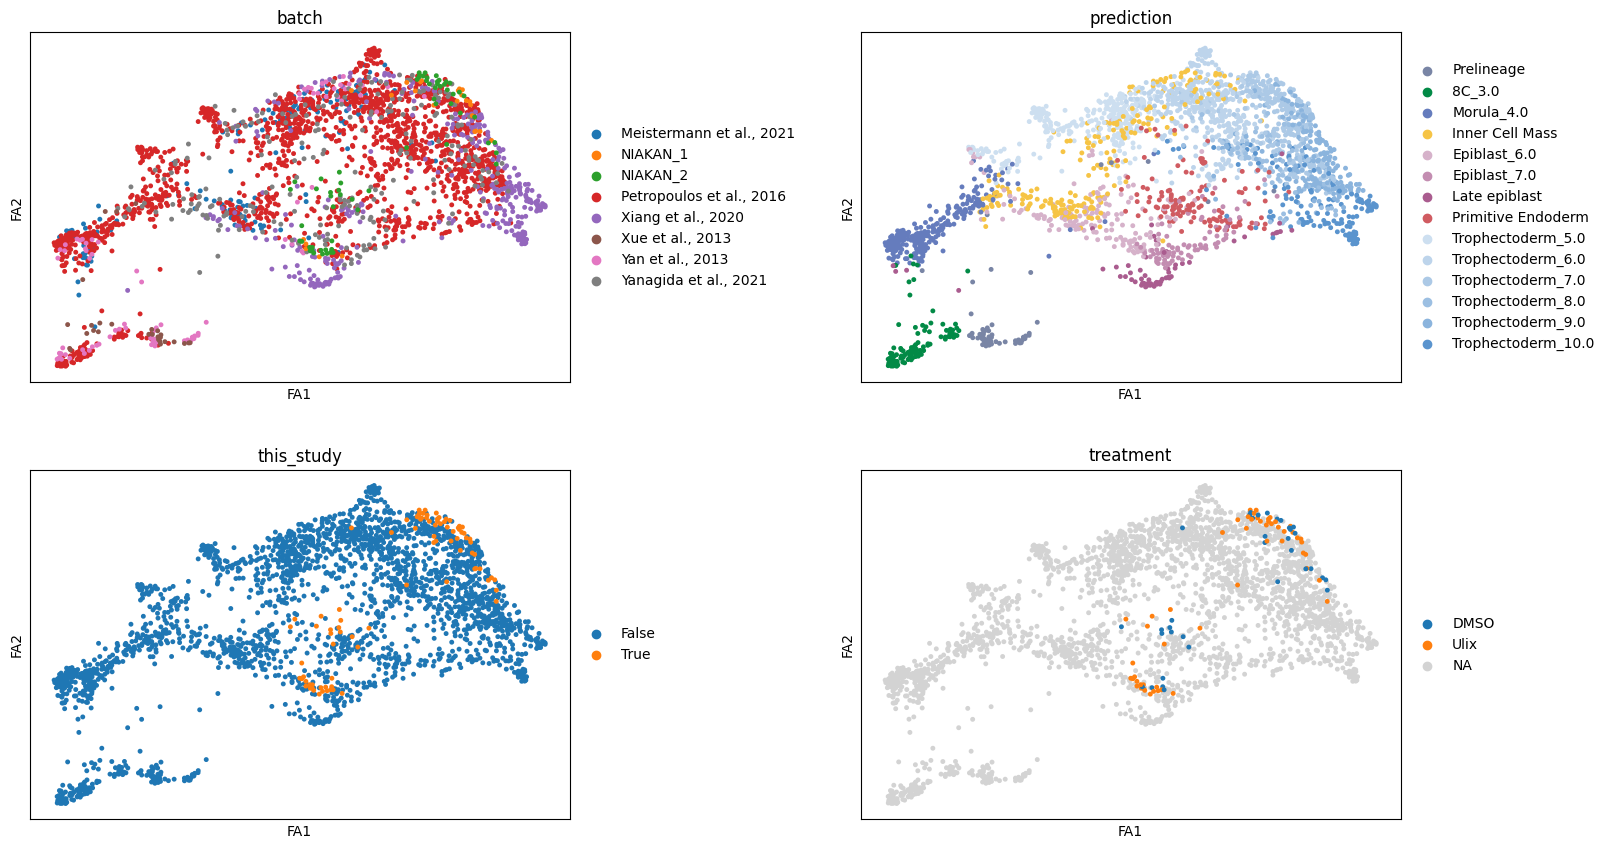

In [326]:

ax = sc.pl.draw_graph(merged_adata,color=['batch', 'prediction', 'this_study', 'treatment'], ncols=2, wspace=0.4, return_fig=True)
ax.savefig('../figures/12_niakan_human_integration_FA.pdf')

## Pseudotime

In [6]:
import scFates as scf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [7]:
lvae = scvi.model.SCANVI.load('../../proks-salehin-et-al-v2/results/100_human_integration/scanvi_ns_15/')
lvae.adata.obs['dataset'] = 'Reference'
lvae.adata.obs['prediction'] = lvae.predict()
lvae.adata.obsm["X_scANVI"] = lvae.get_latent_representation()

lvae_q = scvi.model.SCANVI.load('../results/12_niakan_human_query')
lvae.adata.obs['dataset'] = 'Simon et al, 2024'
lvae_q.adata.obsm["X_scANVI"] = lvae_q.get_latent_representation()

INFO     File ../../proks-salehin-et-al-v2/results/100_human_integration/scanvi_ns_15/model.pt already downloaded  


/projects/dan1/data/Brickman/conda/envs/scvi-1.1.5/lib/python3.10/site-packages/scvi/model/base/_utils.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.loa

INFO     File ../results/12_niakan_human_query/model.pt already downloaded                                         


/projects/dan1/data/Brickman/conda/envs/scvi-1.1.5/lib/python3.10/site-packages/scvi/model/base/_utils.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.loa

In [8]:
merged_adata = anndata.concat([lvae.adata.copy(), lvae_q.adata.copy()])
merged_adata.obs['this_study'] = merged_adata.obs['experiment'] == 'Simon et al, 2024'
merged_adata.obs.prediction = merged_adata.obs.prediction.astype('category')
merged_adata.obs.prediction = merged_adata.obs.prediction.cat.reorder_categories(['Prelineage', '8C_3.0', 'Morula_4.0', 'Inner Cell Mass', 'Epiblast_6.0', 'Epiblast_7.0', 'Late epiblast', 'Primitive Endoderm', 'Trophectoderm_5.0', 'Trophectoderm_6.0', 'Trophectoderm_7.0', 'Trophectoderm_8.0', 'Trophectoderm_9.0', 'Trophectoderm_10.0'], ordered=True)
merged_adata.uns['prediction_colors'] = [ct_colors[ct] for ct in merged_adata.obs.prediction.cat.categories]

merged_adata.obs['treatment'] = 'None'
merged_adata.obs.loc[merged_adata.obs_names.str.contains('Ulix'), 'treatment'] = 'Ulix'
merged_adata.obs.loc[merged_adata.obs_names.str.contains('DMSO'), 'treatment'] = 'DMSO'

In [9]:
merged_adata = merged_adata[merged_adata.obs.prediction.isin(['Morula_4.0', 'Inner Cell Mass','Epiblast_6.0','Epiblast_7.0','Late epiblast','Primitive Endoderm'])].copy()

2024-12-12 11:57:22.994547: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


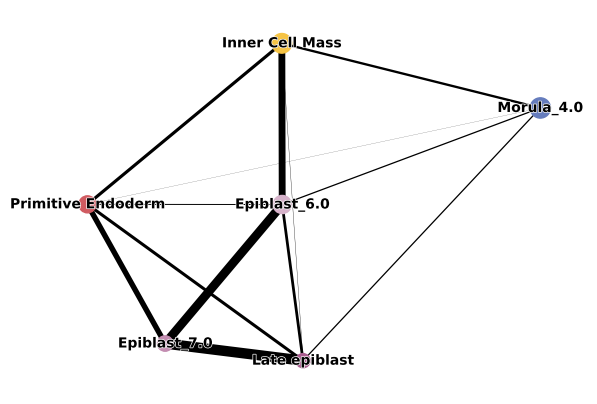

In [10]:
sc.pp.neighbors(merged_adata, use_rep="X_scANVI")
sc.tl.umap(merged_adata)
sc.tl.diffmap(merged_adata)

sc.tl.paga(merged_adata, groups='prediction')
sc.pl.paga(merged_adata, color='prediction', frameon=False, fontoutline=True)
sc.tl.draw_graph(merged_adata, init_pos='paga')

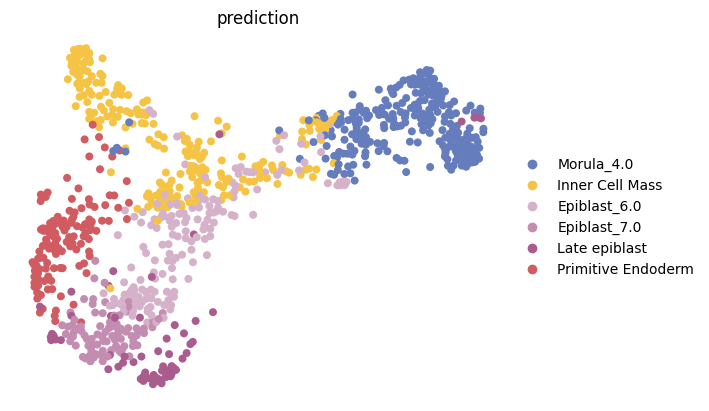

In [11]:
sc.pl.draw_graph(merged_adata, color=['prediction'], frameon=False, ncols=2)

In [12]:
merged_adata.uns['iroot'] = np.flatnonzero(merged_adata.obs['prediction']  == 'Morula_4.0')[0]
sc.tl.dpt(merged_adata)

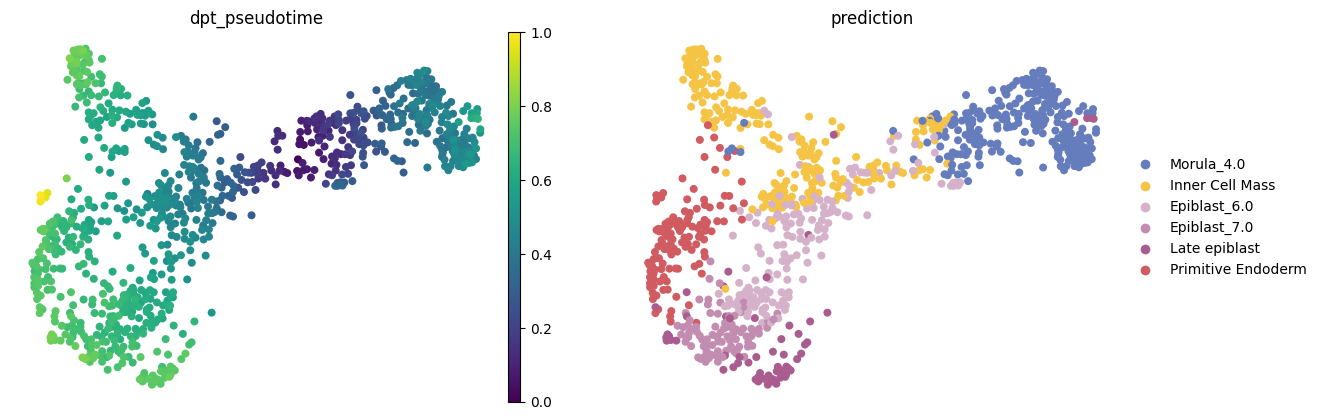

In [13]:
sc.pl.draw_graph(merged_adata, color=['dpt_pseudotime', 'prediction'], frameon=False, ncols=2)

In [14]:
sc.pp.neighbors(merged_adata, use_rep="X_scANVI")
sc.tl.draw_graph(merged_adata)

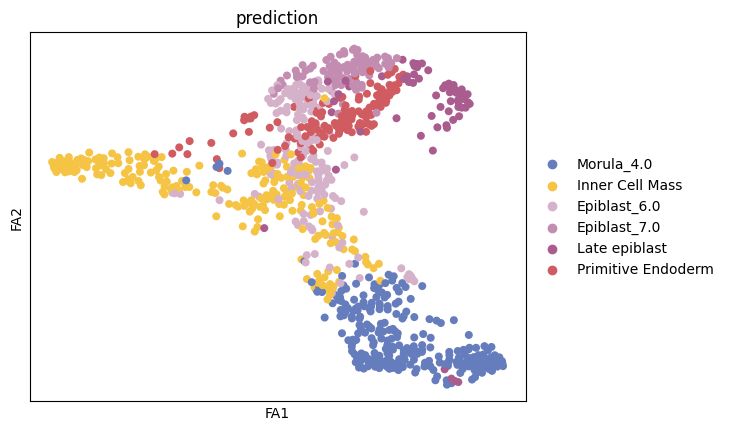

In [15]:
sc.pl.draw_graph(merged_adata, color=['prediction'])

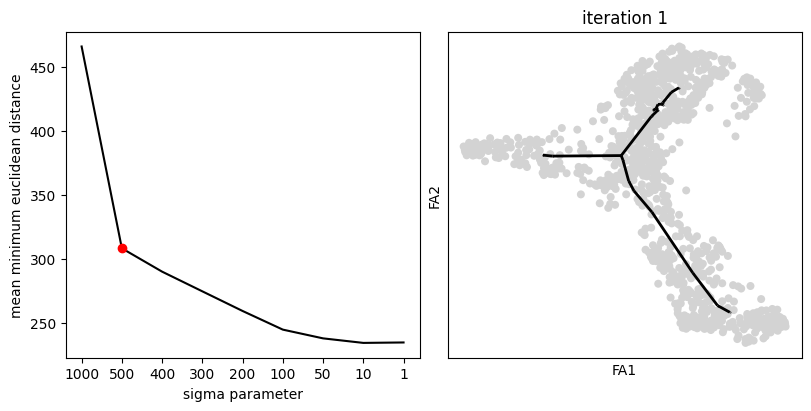

In [16]:
sig = scf.tl.explore_sigma(merged_adata,
                         Nodes=20,
                         use_rep="X_draw_graph_fa",
                         sigmas=[1000,500,400,300,200,100,50,10,1],
                         seed=42,plot=True)

In [17]:
scf.tl.tree(merged_adata,
            Nodes=20,
            use_rep="X_draw_graph_fa",
            method="ppt",
            ppt_nsteps=10,
            ppt_sigma=sig,
            ppt_lambda=100,
            seed=42)

inferring a principal tree --> parameters used 
    20 principal points, sigma = 500, lambda = 100, metric = euclidean
    fitting:   0%|          | 0/10 [00:00<?, ?it/s]

    fitting: 100%|██████████| 10/10 [00:00<00:00, 22.83it/s]
    not converged (error: 0.06862519665918461)
    finished (0:00:00) --> added 
    .uns['ppt'], dictionnary containing inferred tree.
    .obsm['X_R'] soft assignment of cells to principal points.
    .uns['graph']['B'] adjacency matrix of the principal points.
    .uns['graph']['F'] coordinates of principal points in representation space.


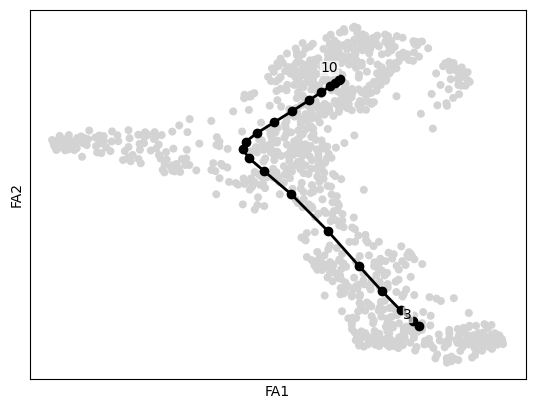

In [18]:
scf.pl.graph(merged_adata)

In [19]:
scf.tl.root(merged_adata, 3)

node 3 selected as a root --> added
    .uns['graph']['root'] selected root.
    .uns['graph']['pp_info'] for each PP, its distance vs root and segment assignment.
    .uns['graph']['pp_seg'] segments network information.


In [20]:
scf.tl.pseudotime(merged_adata,n_jobs=10,n_map=10,seed=42)

projecting cells onto the principal graph
    mappings:   0%|          | 0/10 [00:00<?, ?it/s]

/projects/dan1/data/Brickman/conda/envs/scvi-1.1.5/lib/python3.10/site-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


    mappings: 100%|██████████| 10/10 [00:29<00:00,  2.93s/it]
    finished (0:00:29) --> added
    .obs['edge'] assigned edge.
    .obs['t'] pseudotime value.
    .obs['seg'] segment of the tree assigned.
    .obs['milestones'] milestone assigned.
    .uns['pseudotime_list'] list of cell projection from all mappings.


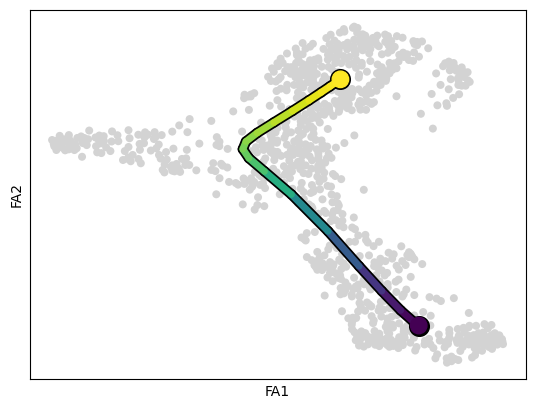

In [21]:
scf.pl.trajectory(merged_adata)

In [22]:
merged_adata.obs['t_scaled'] = MinMaxScaler().fit_transform(merged_adata.obs['t'].values.reshape(-1, 1)).flatten()

In [23]:
merged_adata.uns['treatment_colors'] = ['tab:blue', 'lightgrey', 'tab:orange']

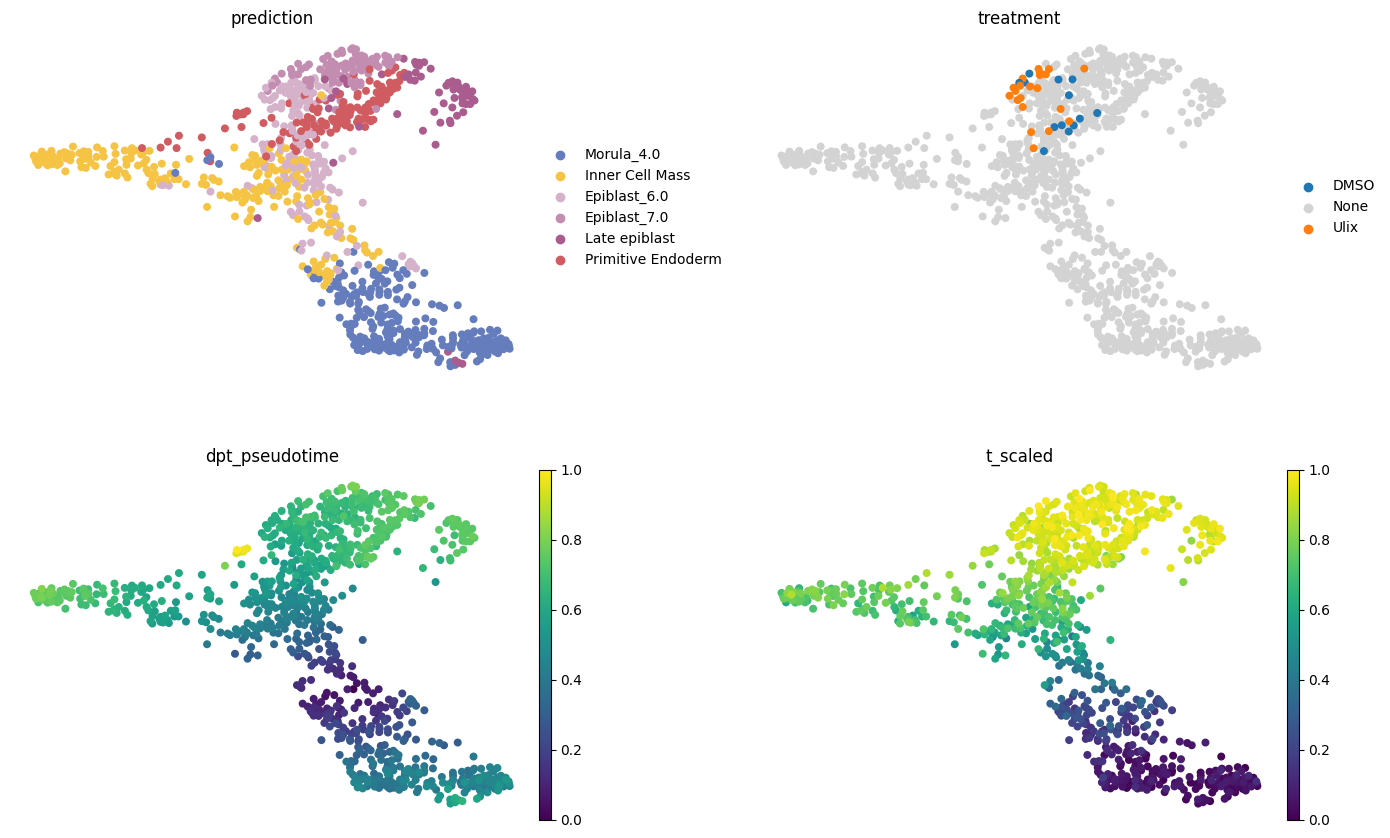

In [24]:
ax = sc.pl.draw_graph(merged_adata, color=['prediction', 'treatment', 'dpt_pseudotime', 't_scaled'], frameon=False, ncols=2, cmap='viridis', wspace=0.3, return_fig=True)
ax.savefig('../figures/12_niakan_human_pseudotime.pdf')

In [22]:
# df = pd.DataFrame({
#     'pseudotime': merged_adata.obs.t_scaled.to_numpy(),
#     'treatment': merged_adata.obs.treatment.to_numpy(),
#     'treatment_codes': merged_adata.obs.treatment.cat.codes.to_numpy()
# }).sort_values(by='pseudotime')

# fig, ax = plt.subplots(2,1,figsize=(10,2.5))
# sns.heatmap(df[['pseudotime']].T, cmap='viridis', cbar=True, xticklabels=False, ax=ax[0])
# sns.heatmap(df[['treatment_codes']].T, cmap=merged_adata.uns['treatment_colors'], cbar=True, xticklabels=False, ax=ax[1])
# fig.savefig('../figures/12_niakan_human_pseudotime_treatment.pdf')

In [56]:
adata = merged_adata[merged_adata.obs.prediction.isin(['Inner Cell Mass','Epiblast_6.0','Epiblast_7.0','Late epiblast'])]
adata = adata[adata.obs.sort_values(by='t_scaled').index].copy()

# df = adata.to_df()
df = adata.raw.to_adata().to_df()
# df.columns = lvae.adata.var.symbol.values
df.columns = ENSG_SYMBOL_df.loc[df.columns.values,'symbol'].values
df = (df - df.min()) / (df.max() - df.min())
df = df\
    .assign(predictions=adata.obs.prediction.cat.codes.to_numpy())\
    .assign(pseudotime=adata.obs.t_scaled.to_numpy())\
    .assign(treatment=adata.obs.treatment)\
    .assign(treatment_codes=adata.obs.treatment.cat.codes.to_numpy())\
    .assign(DMSO=adata.obs.treatment == 'DMSO')\
    .assign(Ulixertinib=adata.obs.treatment == 'Ulix')
df['ps_bins'] = pd.cut(df.pseudotime, bins=np.arange(0, 1.1, 0.1))

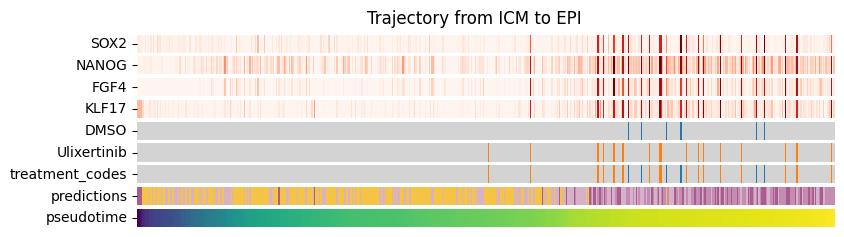

In [57]:
fig, ax = plt.subplots(9,1,figsize=(9,2.5))
for idx, gene in enumerate(['SOX2', 'NANOG', 'FGF4', 'KLF17']):
    sns.heatmap(df[[gene]].T, cmap='Reds', cbar=False, xticklabels=False, ax=ax[idx])
sns.heatmap(df[['DMSO']].T, cbar=False, cmap=['lightgrey', 'tab:blue'], xticklabels=False, ax=ax[4])
sns.heatmap(df[['Ulixertinib']].T, cmap=['lightgrey', 'tab:orange'], cbar=False, xticklabels=False, ax=ax[5])
sns.heatmap(df[['treatment_codes']].T, cbar=False, cmap=list(adata.uns['treatment_colors']), xticklabels=False, ax=ax[6])
sns.heatmap(df[['predictions']].T, cbar=False, cmap=adata.obs.prediction.map(ct_colors).cat.categories.tolist(), xticklabels=False, ax=ax[7])
sns.heatmap(df[['pseudotime']].T, cmap='viridis', cbar=False, xticklabels=False, ax=ax[8])
for ax_ in ax:
    ax_.tick_params(axis='y', rotation=0)
fig.suptitle('Trajectory from ICM to EPI')
fig.savefig('../figures/12_niakan_human_pseudotime_ICM_EPI.pdf', bbox_inches='tight')

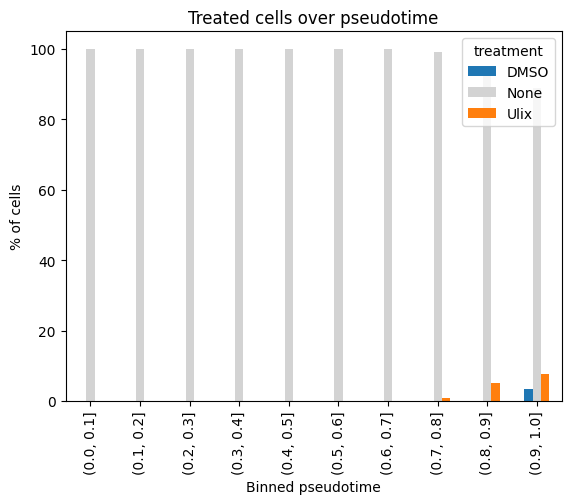

In [58]:
ax = (pd.crosstab(df.ps_bins, df.treatment, normalize='index') * 100).plot.bar(color=['tab:blue', 'lightgrey', 'tab:orange'], title='Treated cells over pseudotime', xlabel='Binned pseudotime', ylabel='% of cells')
ax.figure.savefig('../figures/12_niakan_human_pseudotime_ICM_EPI_treatment.pdf', bbox_inches='tight')